Epoch: 0 Accuracy: 0.00%
Epoch: 1 Accuracy: 78.60%
Epoch: 2 Accuracy: 83.00%
Epoch: 3 Accuracy: 87.80%
Epoch: 4 Accuracy: 92.80%
Epoch: 5 Accuracy: 96.00%
Epoch: 6 Accuracy: 98.00%
Epoch: 7 Accuracy: 99.80%
Epoch: 8 Accuracy: 99.80%
Epoch: 9 Accuracy: 99.80%
Epoch: 10 Accuracy: 100.00%
Weight: [63164.49  97761.836], Bias: -65234404.0


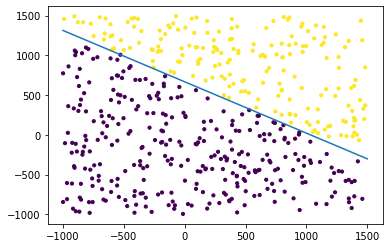

In [1]:
# Linear Classifier with perceptron in part 1 and gradient descent with Hinge loss with L2 Norm in part 2
__author__ = 'Billy Cao'

# Q1
import tensorflow as tf
import matplotlib.pyplot as plt
import generator

batch_size = 500
gen = generator.gen(batch_size)
epochs = 1000

class perceptron:
    def __call__(self, x):  # prediction function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias # For actual prediction, add tf.math.sign

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def train(self, x, y, epoch_count):
        pred = self(x)
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        negativeCountIndex = tf.where(signs <= 0.0).numpy()
        accuracy = positiveCount/signs.shape[0]*100
        for i in negativeCountIndex:
            self.Weight.assign_add(x[i[0]] * y[i[0]])  # i is a tensor [0]
            self.Bias.assign_add(y[i[0]] * self.Weight[1])  # shouldn't have self.Weight by right
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}%')
        return accuracy

model = perceptron()
x, y = next(gen)
# x=tf.convert_to_tensor([[1, -665.6667], [1, -667.6667], [1, -4000.7] ], dtype=tf.float32)
# y=tf.convert_to_tensor([1,-1,-1], dtype=tf.float32)
model.Weight.assign([0.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count)
    if acc == 100:  # Early stopping
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

point1 = -1000
point2 = 1500
plt.plot([point1, point2], [(-model.Weight[0]/model.Weight[1]) * point1 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * point2 + (-model.Bias/model.Weight[1])])
plt.scatter(x[:,0], x[:,1], c=y, s=10)  # Plot some points only, 2D slice notation
plt.show()

Epoch: 0 Accuracy: 76.00% Loss: 116.68955993652344
Epoch: 1 Accuracy: 76.00% Loss: 114.37406158447266
Epoch: 2 Accuracy: 76.00% Loss: 112.05856323242188
Epoch: 3 Accuracy: 75.00% Loss: 109.84420013427734
Epoch: 4 Accuracy: 75.00% Loss: 107.73580169677734
Epoch: 5 Accuracy: 75.00% Loss: 105.62739562988281
Epoch: 6 Accuracy: 75.00% Loss: 103.51899719238281
Epoch: 7 Accuracy: 75.00% Loss: 101.41058349609375
Epoch: 8 Accuracy: 75.00% Loss: 99.30218505859375
Epoch: 9 Accuracy: 75.00% Loss: 97.19377899169922
Epoch: 10 Accuracy: 75.00% Loss: 95.08537292480469
Epoch: 11 Accuracy: 75.00% Loss: 92.97697448730469
Epoch: 12 Accuracy: 75.00% Loss: 90.86856079101562
Epoch: 13 Accuracy: 76.00% Loss: 88.90084075927734
Epoch: 14 Accuracy: 76.00% Loss: 87.12307739257812
Epoch: 15 Accuracy: 77.00% Loss: 85.41793060302734
Epoch: 16 Accuracy: 77.00% Loss: 83.95065307617188
Epoch: 17 Accuracy: 76.00% Loss: 82.60333251953125
Epoch: 18 Accuracy: 76.00% Loss: 81.36380004882812
Epoch: 19 Accuracy: 76.00% Loss: 

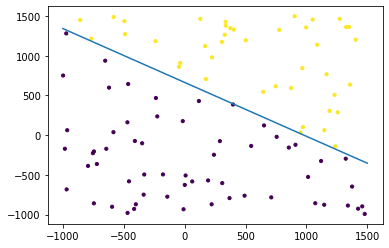

In [2]:
# Q2
import tensorflow as tf
import matplotlib.pyplot as plt
import generator

batch_size = 100
gen = generator.gen(batch_size)
epochs = 500
regTerm = 1e-6
lr = 1e-4

class LinearClassifier:
    def __call__(self, x):  # prediction function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def loss(self, y, pred):  # Hinge loss with L2 Regularisation
        return tf.reduce_mean(tf.math.maximum(0, 1-y*pred) + regTerm * tf.norm(self.Weight, ord='euclidean')**2)  # tf.reduce_mean(max(0, 1-y*pred) + regTerm * tf.sqrt(self.Weight[0] ** 2 + self.Weight[1] ** 2) ** 2)

    def train(self, x, y, epoch_count, lr):
        pred = self(x)
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        accuracy = positiveCount/signs.shape[0]*100
        with tf.GradientTape(persistent=False) as t: # persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
            pred = self(x)
            current_loss = self.loss(y, pred)
        dy_dWeight, dy_dBias = t.gradient(current_loss, [self.Weight, self.Bias])
        self.Weight.assign_sub(lr * dy_dWeight)
        self.Bias.assign_sub(dy_dBias)  # By right should have lr multiple
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}% Loss: {current_loss}')
        return accuracy

model = LinearClassifier()
x, y = next(gen)
# x=tf.convert_to_tensor([[1, -665.6667], [1, -667.6667], [1, -4000.7]], dtype=tf.float32)
# y=tf.convert_to_tensor([1,-1,-1], dtype=tf.float32)
model.Weight.assign([1.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count, lr)
    if acc == 100:  # Early stopping
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

point1 = -1000
point2 = 1500
plt.plot([point1, point2], [(-model.Weight[0]/model.Weight[1]) * point1 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * point2 + (-model.Bias/model.Weight[1])])
plt.scatter(x[:,0], x[:,1], c=y, s=10)  # Plot some points only, 2D slice notation
plt.show()